Files already downloaded and verified
Files already downloaded and verified


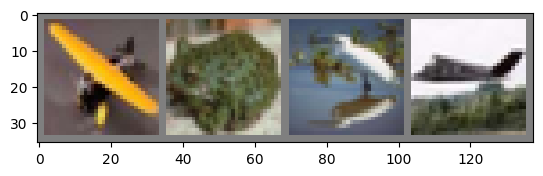

Epoch [1/5], Step [2000/12500], Loss: 2.3053
Epoch [1/5], Step [4000/12500], Loss: 2.2832
Epoch [1/5], Step [6000/12500], Loss: 2.3036
Epoch [1/5], Step [8000/12500], Loss: 2.1344
Epoch [1/5], Step [10000/12500], Loss: 2.1392
Epoch [1/5], Step [12000/12500], Loss: 2.0851
Epoch [2/5], Step [2000/12500], Loss: 2.1069
Epoch [2/5], Step [4000/12500], Loss: 1.7412
Epoch [2/5], Step [6000/12500], Loss: 1.6958
Epoch [2/5], Step [8000/12500], Loss: 1.7552
Epoch [2/5], Step [10000/12500], Loss: 1.3973
Epoch [2/5], Step [12000/12500], Loss: 2.3206
Epoch [3/5], Step [2000/12500], Loss: 1.7002
Epoch [3/5], Step [4000/12500], Loss: 2.5752
Epoch [3/5], Step [6000/12500], Loss: 1.0763
Epoch [3/5], Step [8000/12500], Loss: 1.9683
Epoch [3/5], Step [10000/12500], Loss: 1.1543
Epoch [3/5], Step [12000/12500], Loss: 1.9076
Epoch [4/5], Step [2000/12500], Loss: 1.8231
Epoch [4/5], Step [4000/12500], Loss: 1.4276
Epoch [4/5], Step [6000/12500], Loss: 1.2608
Epoch [4/5], Step [8000/12500], Loss: 1.4460
Epoc

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs=5
batch_size=4
learning_rate=0.001

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_dataset=torchvision.datasets.CIFAR10(root='./data',train=True,transform=transform,download=True)
test_dataset=torchvision.datasets.CIFAR10(root='./data',train=False,transform=transform,download=True)
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

data_iter=iter(train_loader)
images,labels=next(data_iter)

imshow(torchvision.utils.make_grid(images))

class Conv(nn.Module):
  def __init__(self):
    super(Conv,self).__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,16*5*5)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x


model=Conv().to(device)

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

n_total_steps=len(train_loader)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.to(device)
    labels=labels.to(device)

    outputs=model(images)
    loss=criterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes=10
num_epochs=2
batch_size=100
learning_rate=0.001

input_size=28
sequence_length=28
hidden_size=128
num_layers=2

train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

class RNN(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,num_classes):
    super(RNN,self).__init__()
    self.num_layers=num_layers
    self.hidden_size=hidden_size
    self.rnn=nn.RNN(input_size,hidden_size,num_layers,batch_first=True)
    self.fc=nn.Linear(hidden_size,num_classes)


  def forward(self,x):
    h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
    out,_=self.rnn(x,h0)
    out=out[:,-1,:]
    out=self.fc(out)
    return out


model=RNN(input_size,hidden_size,num_layers,num_classes).to(device)

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

n_total_steps=len(train_loader)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.reshape(-1,sequence_length,input_size).to(device)
    labels=labels.to(device)

    outputs=model(images)
    loss=criterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,sequence_length,input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')




Epoch [1/2], Step [100/600], Loss: 0.9987
Epoch [1/2], Step [200/600], Loss: 0.8037
Epoch [1/2], Step [300/600], Loss: 0.3617
Epoch [1/2], Step [400/600], Loss: 0.2734
Epoch [1/2], Step [500/600], Loss: 0.3526
Epoch [1/2], Step [600/600], Loss: 0.5176
Epoch [2/2], Step [100/600], Loss: 0.3564
Epoch [2/2], Step [200/600], Loss: 0.4224
Epoch [2/2], Step [300/600], Loss: 0.1757
Epoch [2/2], Step [400/600], Loss: 0.1651
Epoch [2/2], Step [500/600], Loss: 0.1638
Epoch [2/2], Step [600/600], Loss: 0.1934
Accuracy of the network on the 10000 test images: 93.67 %
